In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
cloth = pd.read_csv('Company_Data.csv')

In [3]:
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cloth['Sales'].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [5]:
cloth.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [6]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
cloth['Sales'].min()

0.0

In [8]:
cloth['Sales'].max()

16.27

In [9]:
cloth['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [10]:
cloth['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [11]:
cloth['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [12]:
cloth.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


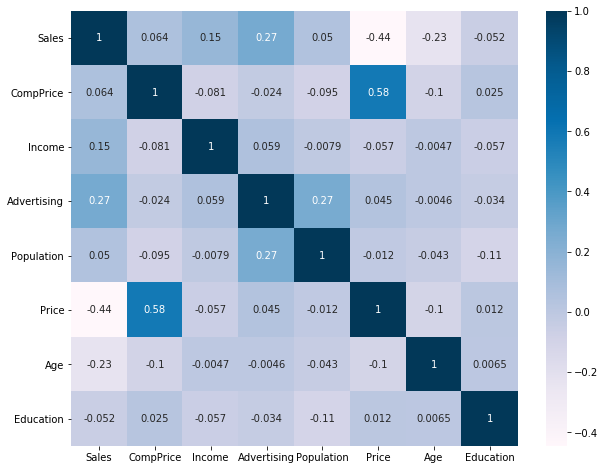

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(data=cloth.corr(), annot=True, cmap='PuBu')
plt.show()

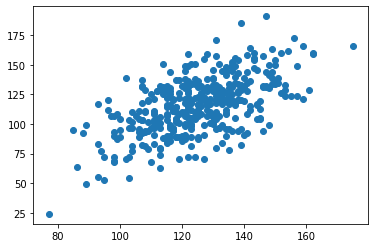

In [14]:
plt.scatter(data=cloth,x='CompPrice', y='Price')
plt.show()

Sales


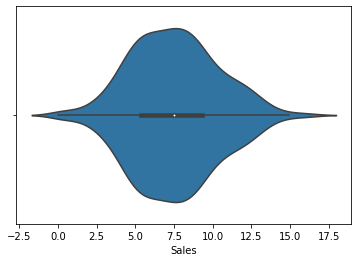

CompPrice


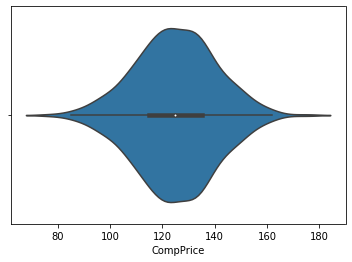

Income


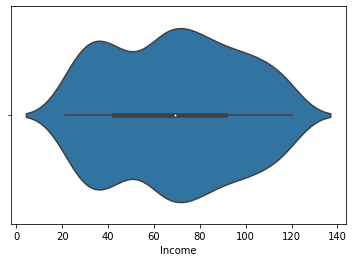

Advertising


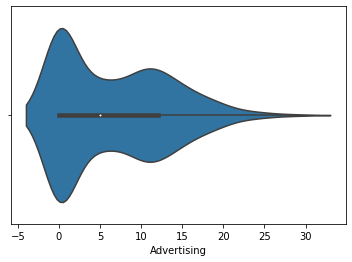

Population


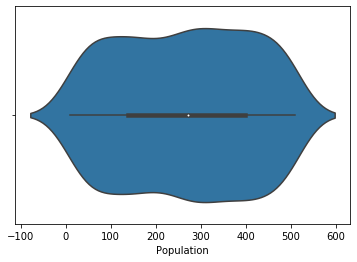

Price


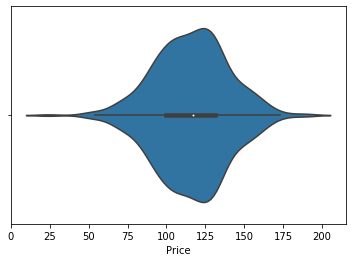

Age


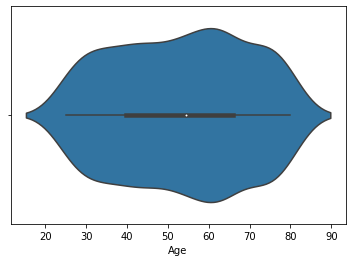

Education


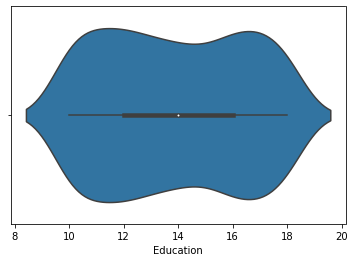

In [15]:
for i in cloth.iloc[:,:].columns:
    if cloth[i].dtype != 'object':
        print(i)
        sns.violinplot(cloth[i], data=cloth)
        #sns.boxplot(df[i])
        plt.show()

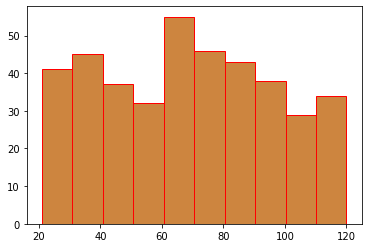

In [16]:
plt.hist(cloth['Income'],facecolor='peru', edgecolor='red')
plt.show()

Let's convert the independent categorical variables to 1-hot numerical

In [17]:
replaceStruct = {
                "ShelveLoc":     {"Bad": 0, "Medium": 1 ,"Good": 2},
                "Urban": {"Yes": 1, "No":0},
                "US": {"Yes": 1, "No":0} 
                    }
oneHotCols=["ShelveLoc","Urban","US"]

In [18]:
cloth=cloth.replace(replaceStruct)
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [19]:
cloth=pd.get_dummies(cloth, columns=oneHotCols, dtype = 'uint8', drop_first=True)

In [20]:
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_1,ShelveLoc_2,Urban_1,US_1
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,0,1,1,1
2,10.06,113,35,10,269,80,59,12,1,0,1,1
3,7.40,117,100,4,466,97,55,14,1,0,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


Let's try to bin the target variable so that it can be considered categorical

In [21]:
bins = [0, 5, 10, 15, 20]
cloth['SalesBin'] = np.digitize(cloth['Sales'], bins, right=False) #right is False as we have '0' in Sales

In [22]:
cloth.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_1,ShelveLoc_2,Urban_1,US_1,SalesBin
0,9.50,138,73,11,276,120,42,17,0,0,1,1,2
1,11.22,111,48,16,260,83,65,10,0,1,1,1,3
2,10.06,113,35,10,269,80,59,12,1,0,1,1,3
3,7.40,117,100,4,466,97,55,14,1,0,1,1,2
4,4.15,141,64,3,340,128,38,13,0,0,1,0,1


In [23]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   ShelveLoc_1  400 non-null    uint8  
 9   ShelveLoc_2  400 non-null    uint8  
 10  Urban_1      400 non-null    uint8  
 11  US_1         400 non-null    uint8  
 12  SalesBin     400 non-null    int64  
dtypes: float64(1), int64(8), uint8(4)
memory usage: 29.8 KB


In [24]:
cloth_new = cloth.drop(columns='Sales')
cloth_new.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_1,ShelveLoc_2,Urban_1,US_1,SalesBin
0,138,73,11,276,120,42,17,0,0,1,1,2
1,111,48,16,260,83,65,10,0,1,1,1,3
2,113,35,10,269,80,59,12,1,0,1,1,3
3,117,100,4,466,97,55,14,1,0,1,1,2
4,141,64,3,340,128,38,13,0,0,1,0,1


In [25]:
def column_boxplots(df,list_cols):
    for i in list_cols:    
        sns.boxplot(x=i, data = df)
        plt.show()

In [26]:
X = cloth_new.drop('SalesBin',axis=1)
y = cloth_new['SalesBin']

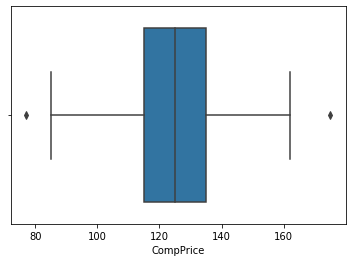

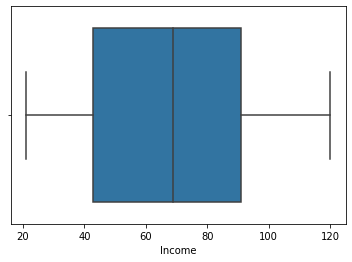

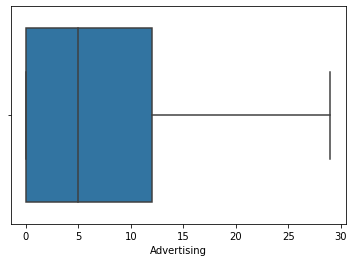

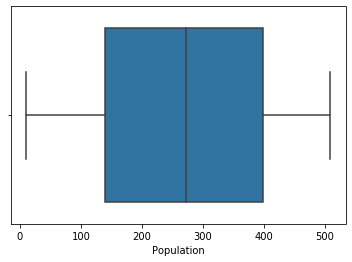

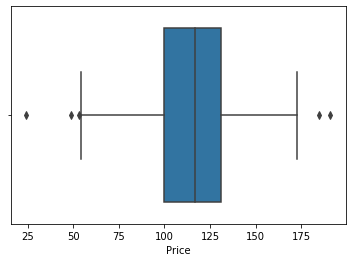

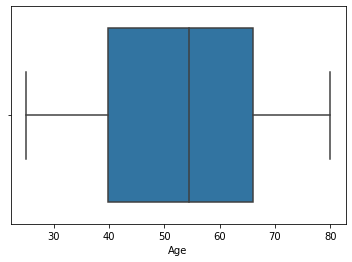

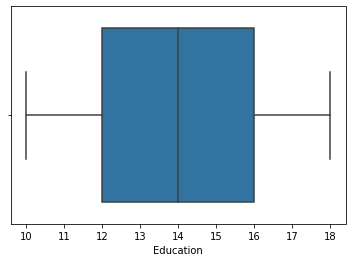

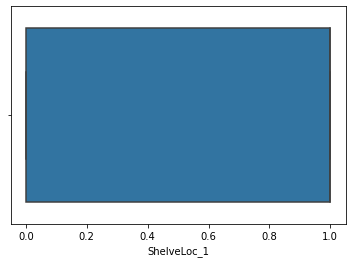

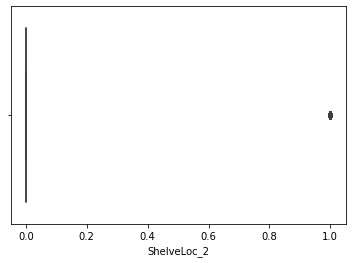

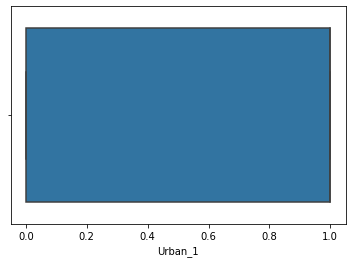

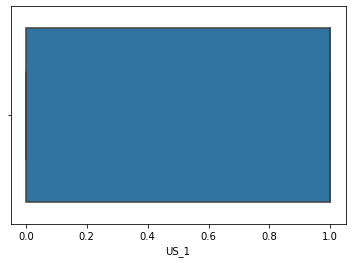

In [27]:
column_boxplots(X,X.columns)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Let's use Random Forest Classifier on the data

### K-Fold - Gini

In [29]:
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier(n_estimators=300, criterion='gini')
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7174999999999999


In [30]:
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.6666666666666666


### K-Fold - Entropy

In [31]:
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier(n_estimators=300, criterion='entropy')
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7175


In [32]:
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.7083333333333334


Let's use Bagging classifier upon Random Forest

In [33]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
#model = BaggingClassifier(estimator=cart, n_estimators=200)
model = BaggingClassifier( n_estimators=200)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7125


In [34]:
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.6666666666666666


Let's use Adaboost classifier upon Random Forest

In [35]:
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier(n_estimators=150)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.6300000000000001


In [36]:
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6071428571428571
0.6083333333333333


## Let us try to keep the target variable as is and try Random Forest Regressor

In [37]:
cloth = cloth.drop(columns='SalesBin')

In [38]:
X = cloth.drop('Sales',axis=1)
y = cloth['Sales']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### K-Fold - Gini

In [40]:
kfold = KFold(n_splits=10, shuffle=True)
model_regress = RandomForestRegressor(n_estimators=500, criterion='absolute_error')
results = cross_val_score(model_regress, X, y, cv=kfold)
print(results.mean())

0.6921399584306893


In [41]:
model_regress.fit(X_train,y_train)
print(model_regress.score(X_train, y_train))
print(model_regress.score(X_test, y_test))

0.953646190526564
0.664579573630171


### K-Fold - Entropy

In [42]:
kfold = KFold(n_splits=10, shuffle=True)
model_regress = RandomForestRegressor(n_estimators=300, criterion='squared_error')
results = cross_val_score(model_regress, X, y, cv=kfold)
print(results.mean())

0.6926857430212563


In [43]:
model_regress.fit(X_train,y_train)
print(model_regress.score(X_train, y_train))
print(model_regress.score(X_test, y_test))

0.9559580160097934
0.6717295853036616


# Problem Statement-2

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [44]:
fraud = pd.read_csv('Fraud_check.csv')
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [45]:
fraud = fraud.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'}, )

In [46]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [47]:
fraud['Fraud'] = fraud['Taxable_Income'] <= 30000

In [48]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,False
1,YES,Divorced,33700,134075,18,YES,False
2,NO,Married,36925,160205,30,YES,False
3,YES,Single,50190,193264,15,YES,False
4,NO,Married,81002,27533,28,NO,False


In [49]:
label = lambda x: 'Risky' if x else 'Good'
fraud['Fraud'] = fraud['Fraud'].apply(label)

In [50]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [51]:
fraud['Fraud'].value_counts()

Good     476
Risky    124
Name: Fraud, dtype: int64

In [52]:
fraud['Marital_Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64

In [53]:
fraud['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [54]:
fraud['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [55]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Fraud            600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [56]:
fraud.corr()

,Taxable_Income,City_Population,Work_Experience
Taxable_Income,1.000000,-0.064387,-0.001818
City_Population,-0.064387,1.000000,0.013135
Work_Experience,-0.001818,0.013135,1.000000


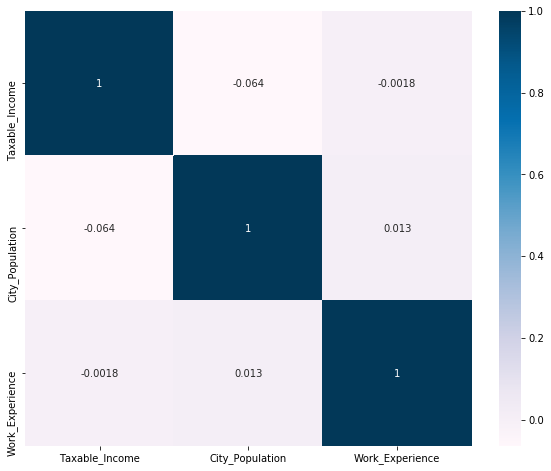

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(data=fraud.corr(), annot=True, cmap='PuBu')
plt.show()

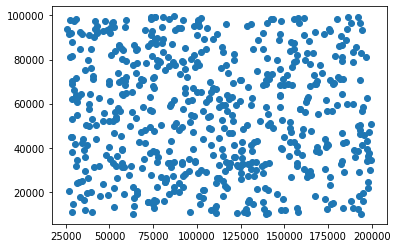

In [58]:
plt.scatter(data=fraud,x='City_Population', y='Taxable_Income')
plt.show()

Taxable_Income


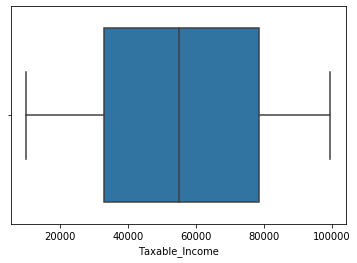

City_Population


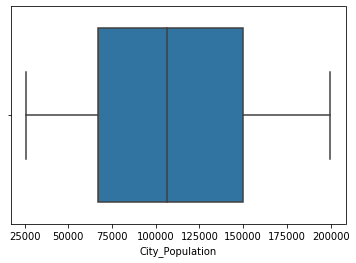

Work_Experience


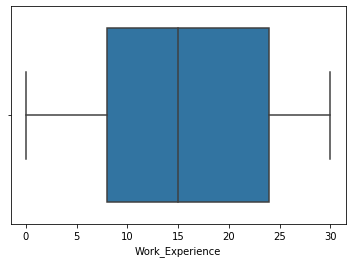

In [59]:
for i in fraud.iloc[:,:].columns:
    if fraud[i].dtype != 'object':
        print(i)
        sns.boxplot(fraud[i])
        plt.show()

Taxable_Income


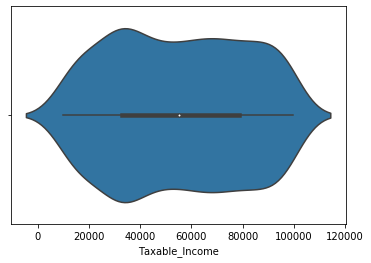

City_Population


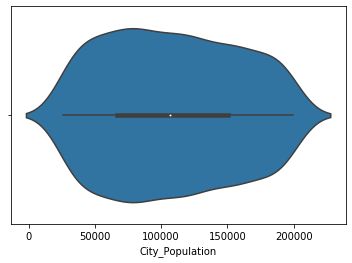

Work_Experience


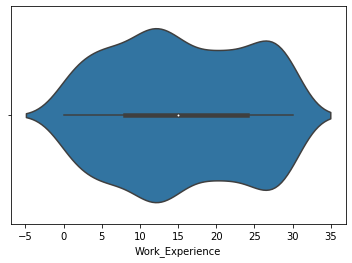

In [60]:
for i in fraud.iloc[:,:].columns:
    if fraud[i].dtype != 'object':
        print(i)
        sns.violinplot(fraud[i], data=fraud)
        #sns.boxplot(df[i])
        plt.show()

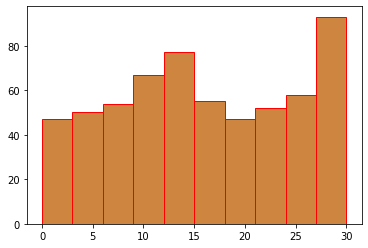

In [61]:
plt.hist(fraud['Work_Experience'],facecolor='peru', edgecolor='red')
plt.show()

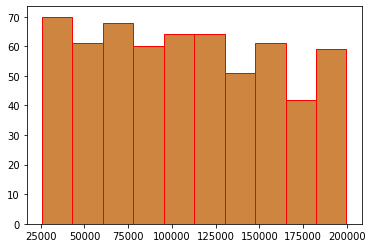

In [62]:
plt.hist(fraud['City_Population'],facecolor='peru', edgecolor='red')
plt.show() 

In [63]:
replaceStruct = {
                "Marital_Status":     {"Single": 0, "Married": 1 ,"Divorced": 2},
                "Undergrad": {"YES": 1, "NO":0},
                "Urban": {"YES": 1, "NO":0} 
                    }
oneHotCols=["Marital_Status","Undergrad","Urban"]

In [64]:
fraud=pd.get_dummies(fraud, columns=oneHotCols, dtype = 'uint8', drop_first=True)

In [65]:
fraud.head()

,Taxable_Income,City_Population,Work_Experience,Fraud,Marital_Status_Married,Marital_Status_Single,Undergrad_YES,Urban_YES
0,68833,50047,10,Good,0,1,0,1
1,33700,134075,18,Good,0,0,1,1
2,36925,160205,30,Good,1,0,0,1
3,50190,193264,15,Good,0,1,1,1
4,81002,27533,28,Good,1,0,0,0


In [66]:
X = fraud.drop(columns='Fraud')
y = fraud['Fraud']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### K-Fold - Gini

In [68]:
kfold = KFold(n_splits=5, shuffle=True)
model = RandomForestClassifier(n_estimators=150, criterion='gini')
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

1.0


In [69]:
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9944444444444445


### K-Fold - Entropy

In [70]:
kfold = KFold(n_splits=5, shuffle=True)
model = RandomForestClassifier(n_estimators=70, criterion='entropy')
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.9983333333333334


In [71]:
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9944444444444445


Bagging

In [72]:
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
#model = BaggingClassifier(estimator=cart, n_estimators=200)
model = BaggingClassifier(n_estimators=200)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.9983333333333334


In [73]:
model.fit(X_train,y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9944444444444445
